# Implementation of K-nearest neighbors (KNN) algorithm for human face recognition




## Authors: Maria Chiritescu, Georgi Georgiev, Gabriela Marinova and Deniz Akinbosoye

## July 2021




## Abstract

(...)


## Table of contents

1. Introduction 
2. Our Dataset
3. Methods

    3.1 Implementing Principle component analysis (PCA) algorithm
    
    3.2 Implementing K-nearest neighbors (KNN) algorithm
    
    
5. Further applications
6. Results
7. Discussion
8. References



## Introduction



## Our Dataset
The Extended Yale Face Database B is an online-available folder, that can be easily downloaded on each computer and which represents the raw material that the program uses. The folder contains 39 subfolders, each subfolder containing 64 pictures of one person and only one. The pictures from each subfolder are of “.pgm” format and differ from one another in illumination conditions. All pictures are grayscale and have the dimension of 168×192 pixels. 
If given a new picture to analyze, the program is able to tell whether or not the person in that picture is in the dataset and if the answer is affirmative, to return the name of the subfolder corresponding to that certain person. It is worth mentioning that the ideal case would be to return the name of the person, however these names were not available, so returning the name of the subfolder dedicated to them appears to be the most appropriate result of the program.
Considering the fact that there is a limited number of pictures for each person, no extra picture can be found in order to test the program’s ability to recognize the individual in it. In this respect, the dataset has to be modified the following way. A number of 13 pictures were extracted from each subfolder and transfered into the testing set. In other words, the testing set contains pictures of people from the dataset, which the program has to recognize. The remaining 51 pictures in each folder make up the training set, so it contains to images with which the program has to compare each picture from the testing set:
It is worth mentioning that the original dataset contained a number of pictures with the extension „.bad”. The light illumination in this pictures reveals very few and vague characteristics of the person inside of it, so that they would not deliver relevant information to the program when analyzed. On this line, because these „.bad” they look very much alike with one another, they were represent a disadvantage to the program ans, as such, were left out of both the testing and the training set.


##  Implementing principle component analysis (PCA) algorithm
Now we move to our PCA class. To prepare the images for the PCA we need to center them by calculating the mean image which is done by finding the mean value of each pixel of the images in the dataset. The mean image is then subtracted from every image in the Dataset and saved as a normalized matrix. The PCA can be done in one of two was using Eigen Value Decomposition (EVD) Singular Value Decomposition (SVD). The number of components is calculated by means of a cumulative sum of the explained variance (for this the eigenvalues need to be calculated). EVD calculates the eigenvalues and eigenvectors of the covariance matrix of our image matrix, then uses the calculated eigenvectors to transform the original matrix and thus reduce its dimensions. As the dimensionality reduction is performed only on the pixels the transformation matrix the eigenvector matrix should have a shape (number of original pixels x number of components) in order for the matrix multiplication to make sense. Since this requires a covariance matrix of a shape (number of original pixels x number of original pixels) the computational time for this method has made it unpractical. The less time-consuming method for dimensionality reduction is SVD. It calculates three matrices U, S and Vt if G is our image matrix then: U has the eigenvectors of G.Gt as columns,  S has square roots of the eigenvalues of G.Gt and Gt.G in its diagonal and  V has the eigenvectors of Gt.G as columns.


## Implementing K-nearest neighbors (KNN) algorithm

K- nearest neighbors is one of the simplest Machine Learning algorithms which assumes the similarity between new data and already available data. Moreover, it assigns the new category to its closest neighbors from the established categories as well as to their labels (Peterson, 2009). 
Based on the given dataset, this method classifies the test - dataset by comparing the distance between the pixels of every single image in the testing data and the pixels of all images in the training data. For distance measurement a so called Euclidean distance has been calculated, which is done by using the following formula, where the variable "xi" represents the arrays of the pictures from training set after tranformation with PCA method and "yi" variable shows the PCA transformed arrays of every single image from testing set (Aufmann et al. 2007). The arrays contain the reduced number of pixels.

$$ d_{x,y} = \sqrt{(\sum_{i=1}^{n}({x}i-{y}i)^2)}$$

Since the distances has been determined, they are sorted by increasing values, where the smalles are used for label allocation. The number of distances corresponds to the number of k, therefore, by altering the k value, different amount of distances between images has been observed. The aim of these changes is to find the most reliable value of k, so that as many pictures as possible are assigned to their correct labels. In this case the labels are the names of the folders, where each folder contains the images of one different person.
To visualize the success of our model an accuracy function has been used, which calculates the percentage of the correctly determined images:

$$ accuracy = \frac{correct.images}{total.images}\,100 $$



## Results



### Data split


In [4]:
from Classes import imagetomatrix as img
from Classes import datasplit as ds
# Get the paths and labels of the data
train_percent = 80

yaleB = ds.MetaData(train_percent)

# Load the the paths as image matrices
image_width, image_height = 168, 192

training_set = img.ImageToMatrixClass(yaleB.training_paths, image_width, image_height)
testing_set = img.ImageToMatrixClass(yaleB.testing_paths, image_width, image_height)
train_matrix = training_set.matrix
test_matrix = testing_set.matrix

Training image_paths are loaded successfully [51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51]
Testing image_paths are loaded successfully [13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 9, 8, 9, 12, 11, 12, 12, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13]
The dataset is loaded successfully into an image_matrix (1938, 32256)
The number of rows is the number of images in the dataset 1938
The number of columns is the number of pixels in an image 32256
The dataset is loaded successfully into an image_matrix (476, 32256)
The number of rows is the number of images in the dataset 476
The number of columns is the number of pixels in an image 32256


### PCA


In [2]:
from Classes import pcaalgorithm as pca
# Do PCA dimension reduction
pca_images = pca.PCA(train_matrix, 99)
pca_model = pca_images.fit_svd()

train_tr = pca_images.transform(train_matrix)
test_tr = pca_images.transform(test_matrix)
print(train_tr.shape, test_tr.shape)

The principal components have been calculated using svd (310, 32256)
(1938, 310) (476, 310)


### KNN


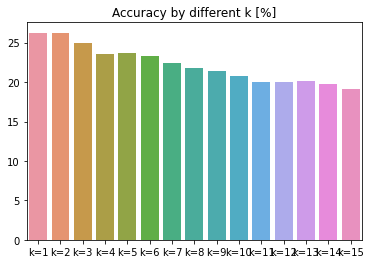

barplot None


In [3]:
from Classes import knearestneighbors as knn
import Visualising as vis
# Loading KNN
train_knn = knn.KNearestNeighbors(train_tr, yaleB.training_labels, k=2)
predicted_labels = train_knn.predict(test_tr)
# Plotting accuracy
k_values = ['k=1', 'k=2', 'k=3', 'k=4', 'k=5',
            'k=6', 'k=7', 'k=8', 'k=9', 'k=10',
            'k=11', 'k=12', 'k=13', 'k=14', 'k=15']
knn_visual = vis.k_barplot(k_values, train_tr, yaleB, test_tr)
print("barplot", knn_visual)

This barplot visualizes the accuracy by changing the number of k nearest neighbors. On y axis the persentage of the obtained results has been shown and on x axis are the k values from 1 to 15. By using our implemented algorithm, it is proven that the most reliable value of k is 2, because for it the precentage is the highest - 75%, therefore the test images receive the most  correct labels. By increasing the number of k, a slightly declining trend is represented. When k is equal to 15, the accuracy is the lowest, thus, more and more images are assigned to the wrong person.

(1938, 277) (476, 277)
31.30252100840336 From the KNN function


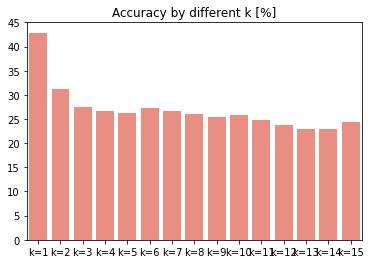

sklearnplot None


In [5]:
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.metrics import accuracy_score

# Probe with the ready-made functions
pca = PCA(n_components=0.99)
train = pca.fit_transform(train_matrix)
test = pca.transform(test_matrix)
print(train.shape, test.shape)

# Probe with the ready-made function
neighbors = KNN(n_neighbors=2)
train_knn = neighbors.fit(X=train, y=yaleB.training_labels)
predicted_labels1 = neighbors.predict(test)
score = accuracy_score(yaleB.testing_labels, predicted_labels1)
print(score*100, "From the KNN function")

# Plotting accuracy with ready-made function
k_values = ['k=1', 'k=2', 'k=3', 'k=4', 'k=5',
            'k=6', 'k=7', 'k=8', 'k=9', 'k=10',
            'k=11', 'k=12', 'k=13', 'k=14', 'k=15']
knn_visual = vis.k_sklearnplot(k_values, train, yaleB, test)
print("sklearnplot", knn_visual)

The represented barplot describes the same information like the already shown one but this time the already existing functions for PCA and KNN classifier are taken from the software machine learning library called Scikit-learn. That was done in order to make a comparison between our implemented model and the already established one. It can be seen that the difference between the accuracy percentage is not very big, hence, almost the same number of test pictures are assigned correctly to their labels. By decreasing the number of k, the accuracy decreases as well, just like using our self-made code.

### Discussion





Regarding the first barplot with accuracy percentage and number of k nearest neighbors, it was already concluded that the best value of k is equal to 2. This result doesn't correspond to the literature expectations which are: increasing the k values means increasing the accuracy(Buxmann et al, 2019). The reason for this outcome could be...


By using the estimated functions from Scikit-learn we obtained almost the same results as the ones after using our implemented code which means that our implemented algorithm works as expected. Nevertheless, little deviations could be found because the already existing function for PCA reduces the dimensions more than our code.


## References

Peterson, LE. (2009). K-nearest neighbor. *Scholarpedia* 1883, 4.

Aufmann, Richard N., Barker, Vernon C., Nation, Richard D. (2007). College Trigonometry, Sixth Edition. Cengage Learning, p. 17

Buxmann P., Schmidt H., Peters F. (2019). K-Nearest Neighbors.*KI-Business*